In [72]:
cv=pd.read_csv('covid_dataset.csv')
cv

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [73]:
cv.shape

(23688, 5)

In [74]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [75]:
cv.describe

<bound method NDFrame.describe of              Date             Country  Confirmed  Recovered  Deaths
0      2020-01-22         Afghanistan          0          0       0
1      2020-01-22             Albania          0          0       0
2      2020-01-22             Algeria          0          0       0
3      2020-01-22             Andorra          0          0       0
4      2020-01-22              Angola          0          0       0
...           ...                 ...        ...        ...     ...
23683  2020-05-26  West Bank and Gaza        429        365       3
23684  2020-05-26      Western Sahara          9          6       1
23685  2020-05-26               Yemen        249         10      49
23686  2020-05-26              Zambia        920        336       7
23687  2020-05-26            Zimbabwe         56         25       4

[23688 rows x 5 columns]>

In [76]:
cv.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [77]:
cv.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

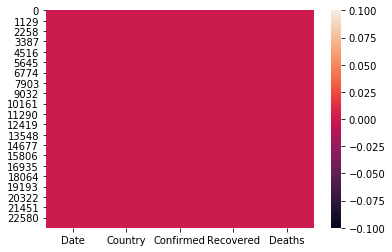

In [78]:
sns.heatmap(cv.isnull())

 there are no isnull values so we can proceed further

In [79]:
cv_cor=cv.corr()
cv_cor

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


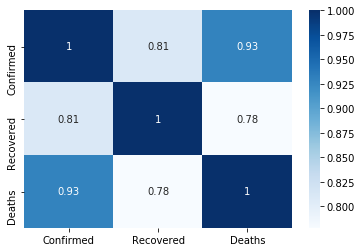

In [80]:
sns.heatmap(cv_cor,cmap='Blues',annot=True)

->The correlation between recoverd and confirmed cases are higher
->where as correlation is lower in death and recoverd

In [81]:
# now the date column is in object type so convert it into datetime type we are framming 
cv['Date']=pd.to_datetime(cv.Date)
cv.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [82]:
cv.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [83]:
# grouping different types of cases as per the date
datewise=cv.groupby(['Date']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise['Days Since']=datewise.index-datewise.index.min()

In [84]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(cv["Country"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])

Basic Information
Totol number of countries with Disease Spread:  188
Total number of Confirmed Cases around the World:  5589626
Total number of Recovered Cases around the World:  2286956
Total number of Deaths Cases around the World:  350453
Total number of Active Cases around the World:  2952217
Total number of Closed Cases around the World:  2637409


In [85]:
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))

Approximate number of Confirmed Cases per Day around the World:  44362.0
Approximate number of Recovered Cases per Day around the World:  18150.0
Approximate number of Death Cases per Day around the World:  2781.0
Approximate number of Confirmed Cases per hour around the World:  1848.0
Approximate number of Recovered Cases per hour around the World:  756.0
Approximate number of Death Cases per hour around the World:  116.0


#Approximate number

In [86]:
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Number of Confirmed Cases in last 24 hours:  94565
Number of Recovered Cases in last 24 hours:  55218
Number of Death Cases in last 24 hours:  4221


<function matplotlib.pyplot.show(*args, **kw)>

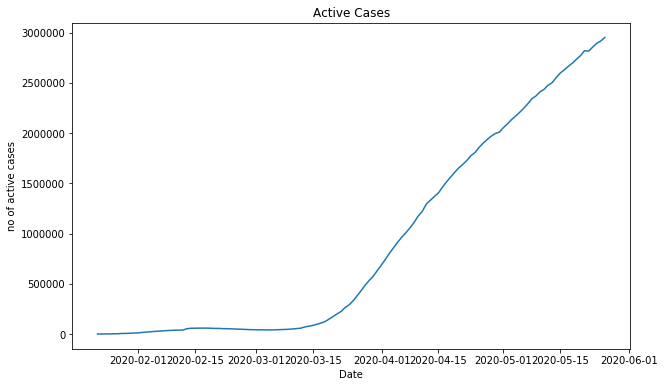

In [87]:
plt.figure(figsize=(10,6))
plt.ylabel('no of active cases')
ax=sns.lineplot(data=cv,x=datewise.index,y=datewise['Confirmed']-datewise['Recovered']-datewise['Deaths'])
plt.title('Active Cases')
plt.show

 ACTIVE CASES=CONFIRMED CASES-RECOVERED CASES-DEATH CASES

IN EVERY MONTH FOR EACH 15 DAYS THERE WILL BE INCREASE IN ACTIVE CASES

<function matplotlib.pyplot.show(*args, **kw)>

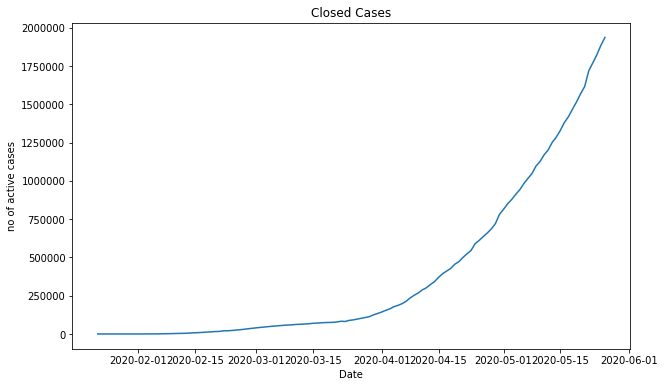

In [88]:
plt.figure(figsize=(10,6))
plt.ylabel('no of active cases')
ax=sns.lineplot(data=cv,x=datewise.index,y=datewise['Recovered']-datewise['Deaths'])
plt.title('Closed Cases')
plt.show

CLOSED CASES=RECOVERED CASES-DEATH CASES

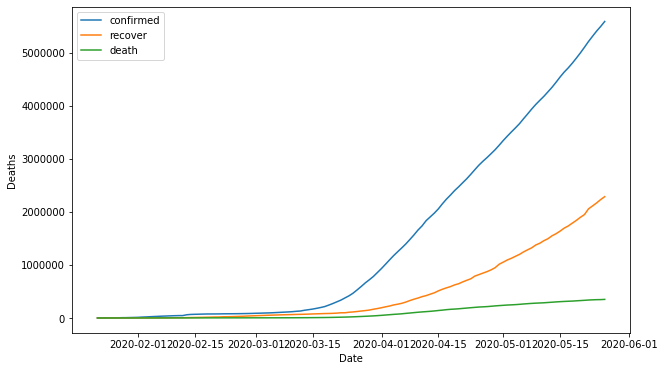

In [89]:
plt.figure(figsize=(10,6))
plt.ylabel('cases')
sns.lineplot(x=datewise.index,y=datewise['Confirmed'],label='confirmed')
sns.lineplot(x=datewise.index,y=datewise['Recovered'],label='recover')
sns.lineplot(x=datewise.index,y=datewise['Deaths'],label='death')

In [90]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

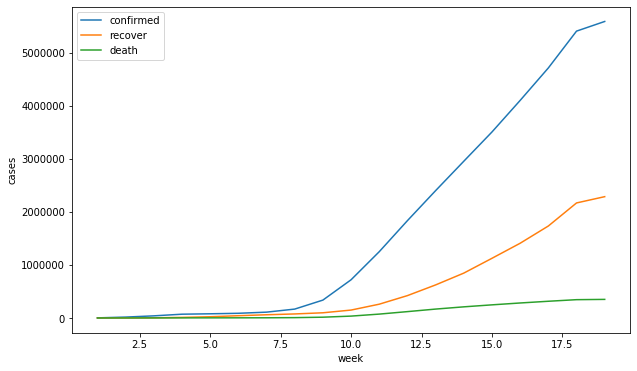

In [91]:
plt.figure(figsize=(10,6))
plt.xlabel('week')
plt.ylabel('cases')
sns.lineplot(x=week_num,y=weekwise_confirmed,label='confirmed')
sns.lineplot(x=week_num,y=weekwise_recovered,label='recover')
sns.lineplot(x=week_num,y=weekwise_deaths,label='death')

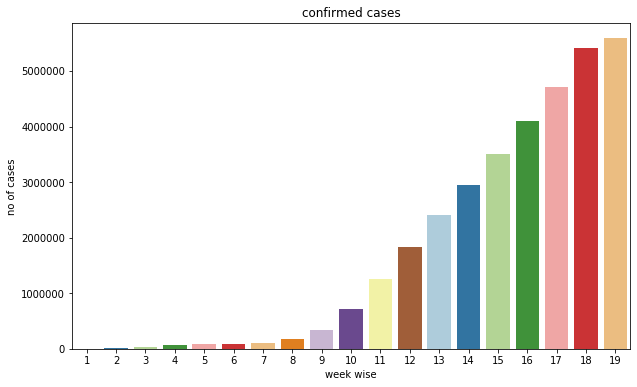

In [92]:
plt.figure(figsize=(10,6))
plt.xlabel('week wise')
plt.ylabel('no of cases')
plt.title('confirmed cases')
sns.barplot(data=cv,x=week_num,y=weekwise_confirmed,palette='Paired')

OBSERVATIONS
-> FROM THE WEEK OF 8 THERE WILL INCREASE IN CONFIRMED CASES

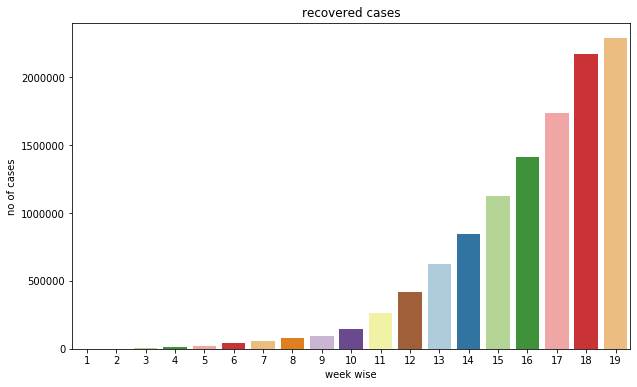

In [93]:
plt.figure(figsize=(10,6))
plt.xlabel('week wise')
plt.ylabel('no of cases')
plt.title('recovered cases')
sns.barplot(data=cv,x=week_num,y=weekwise_recovered,palette='Paired')

OBSERVATION
-> AS WE SEE HERE THE RECOVER RATE IS MUCH BETTER THAN DEATH RATES

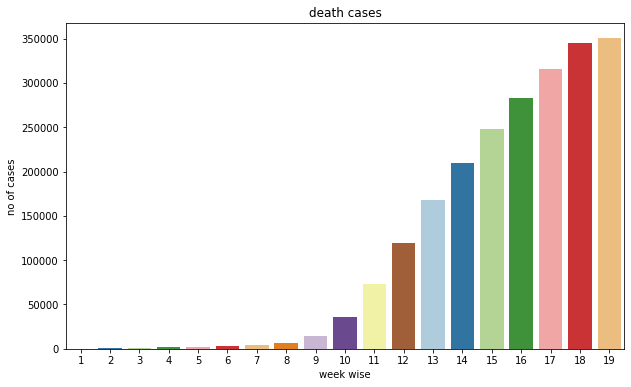

In [94]:
plt.figure(figsize=(10,6))
plt.xlabel('week wise')
plt.ylabel('no of cases')
plt.title('death cases')
sns.barplot(data=cv,x=week_num,y=weekwise_deaths,palette='Paired')

OBSERVATIONS
-> AS WE SEE FORM THE FIRST 8 WEEKS THERE IS LOW IN DEATH RATE WHERE AS FROM  9TH WEEK THERE WILL BE SUDDEN INCREASE IN DEATH RATE

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254AD7BF5C8>,
      dtype=object)

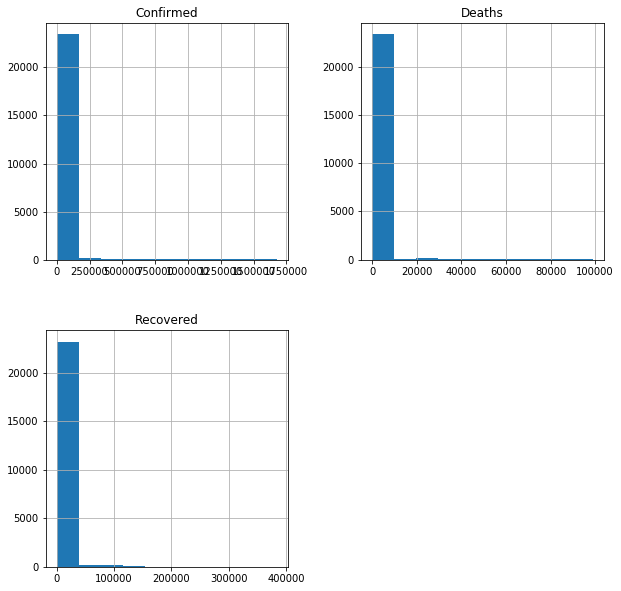

In [95]:
cv.hist(figsize=(10,10))

In [96]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

Average Mortality Rate 4.779278635775958
Median Mortality Rate 4.601951738414701
Average Recovery Rate 27.480793070635617
Median Recovery Rate 27.7636187930512


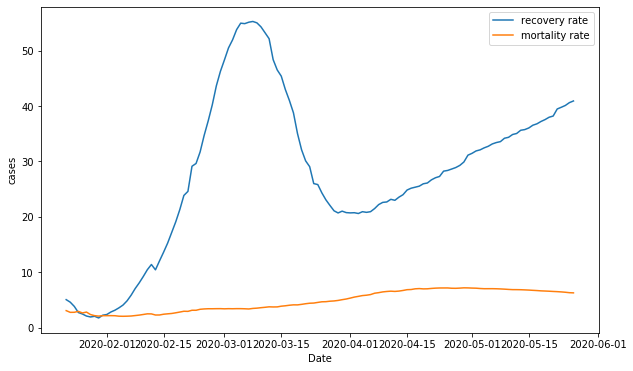

In [97]:
plt.figure(figsize=(10,6))
plt.xlabel('dates')
plt.ylabel('cases')
sns.lineplot(x=datewise.index,y=datewise['Recovered']/datewise['Confirmed']*100,label='recovery rate')
sns.lineplot(x=datewise.index,y=datewise['Deaths']/datewise['Confirmed']*100,label='mortality rate')

RECOVERY RATE = RECOVERD/CONFIRMED*100
MORTALITY RATE = DEATHS/CONFIRMED*100
OBSERVATIONS
-> HERE THE RECOVERY RATE IS GOOD THAN MORTALITY RATE

In [98]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

Average increase in number of Confirmed Cases every day:  44358.0
Average increase in number of Recovered Cases every day:  18150.0
Average increase in number of Deaths Cases every day:  2781.0


Text(0.5, 1.0, 'daily increase cases')

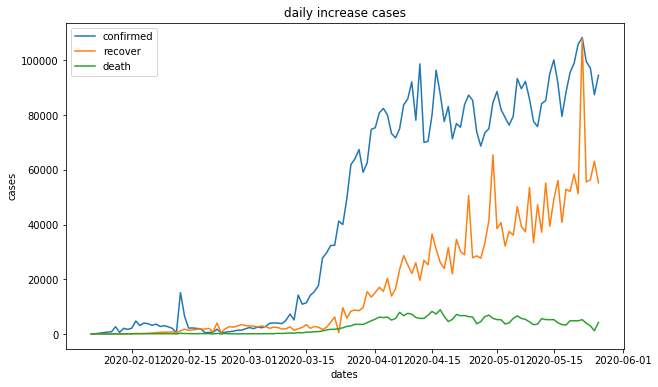

In [99]:
plt.figure(figsize=(10,6))
sns.lineplot(x=datewise.index,y=datewise['Confirmed'].diff().fillna(0),label='confirmed')
sns.lineplot(x=datewise.index,y=datewise['Recovered'].diff().fillna(0),label='recover')
sns.lineplot(x=datewise.index,y=datewise['Deaths'].diff().fillna(0),label='death')
plt.xlabel('dates')
plt.ylabel('cases')
plt.title('daily increase cases')

In [100]:
# now lets see growth rate
print("Average Growth rate Confirmed Cases every day:",(datewise["Confirmed"]/datewise['Confirmed'].shift()).mean())
print("Average Growth rate Recovered Cases every day: ",(datewise["Recovered"]/datewise['Recovered'].shift()).mean())
print("Average Growth rate Deaths Cases every day: ",(datewise["Deaths"]/datewise['Deaths'].shift()).mean())
print("Median Growth rate Confirmed Cases every day:",(datewise["Confirmed"]/datewise['Confirmed'].shift()).median())
print("Median Growth rate Recovered Cases every day: ",(datewise["Recovered"]/datewise['Recovered'].shift()).median())
print("Median Growth rate Deaths Cases every day: ",(datewise["Deaths"]/datewise['Deaths'].shift()).median())

Average Growth rate Confirmed Cases every day: 1.0818837623212847
Average Growth rate Recovered Cases every day:  1.1001255900135045
Average Growth rate Deaths Cases every day:  1.0870756839427627
Median Growth rate Confirmed Cases every day: 1.0375444032952914
Median Growth rate Recovered Cases every day:  1.0575851936318583
Median Growth rate Deaths Cases every day:  1.057299451918286


Text(0.5, 1.0, 'growth fatcor')

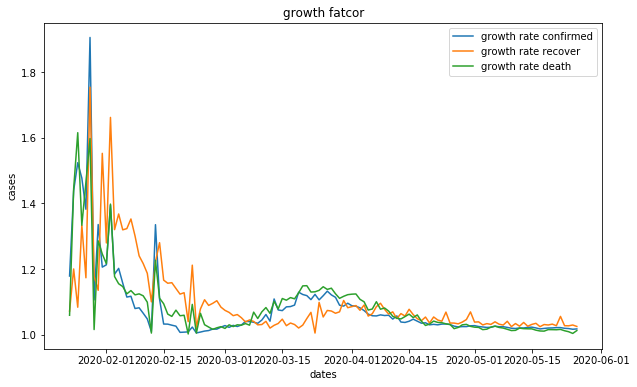

In [101]:
plt.figure(figsize=(10,6))
sns.lineplot(x=datewise.index,y=datewise['Confirmed']/datewise['Confirmed'].shift(),label='growth rate confirmed')
sns.lineplot(x=datewise.index,y=datewise['Recovered']/datewise['Recovered'].shift(),label='growth rate recover')
sns.lineplot(x=datewise.index,y=datewise['Deaths']/datewise['Deaths'].shift(),label='growth rate death')
plt.xlabel('dates')
plt.ylabel('cases')
plt.title('growth fatcor')

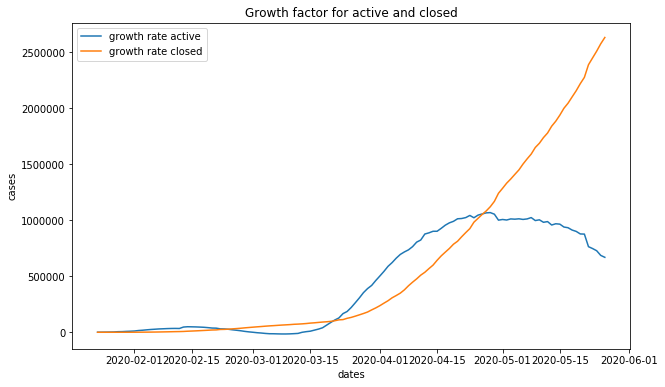

In [102]:
plt.figure(figsize=(10,6))
sns.lineplot(x=datewise.index,y=(datewise['Confirmed']-datewise['Recovered']-datewise['Deaths']/datewise['Confirmed']-datewise['Recovered']-datewise['Deaths'].shift()),label='growth rate active')
sns.lineplot(x=datewise.index,y=(datewise['Recovered']+datewise['Deaths']/datewise['Recovered']+datewise['Deaths'].shift()),label='growth rate closed')
plt.title('Growth factor for active and closed')
plt.xlabel('dates')
plt.ylabel('cases')
legend=dict(x=0,y=-0.4,traceorder='normal')

# COUNTRY WISE ANALYSIS

In [103]:
#CALCULATING COUNTRYWISE MORATLITY AND RECOVER RATE
countrywise=cv[cv["Date"]==cv["Date"].max()].groupby(["Country"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100
grouped_country=cv.groupby(["Country","Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

In [104]:
country_last_24_confirmed=[]
country_last_24_recovered=[]
country_last_24_deaths=[]
for country in countrywise.index:
    country_last_24_confirmed.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Confirmed"])
    country_last_24_recovered.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Recovered"])
    country_last_24_deaths.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Deaths"])

In [105]:
Last_24_Hours_country=pd.DataFrame(list(zip(countrywise.index,country_last_24_confirmed,country_last_24_recovered,country_last_24_deaths)),
                                   columns=["Country Name","Last 24 Hours Confirmed","Last 24 Hours Recovered","Last 24 Hours Deaths"])

In [106]:
Top_15_Confirmed_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Confirmed"],ascending=False).head(15)
Top_15_Recoverd_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Recovered"],ascending=False).head(15)
Top_15_Deaths_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Deaths"],ascending=False).head(15)

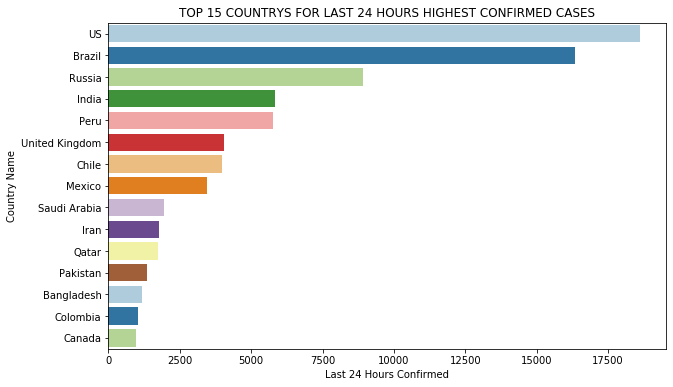

In [107]:
plt.figure(figsize=(10,6))
plt.title('TOP 15 COUNTRYS FOR LAST 24 HOURS HIGHEST CONFIRMED CASES')
sns.barplot(x=Top_15_Confirmed_24hr['Last 24 Hours Confirmed'],y=Top_15_Confirmed_24hr['Country Name'],palette='Paired')

OBSERVATIONS
-> US AS HIGHER CONFIRM CASES IN LAST 24 HOURS FOLLOWED BY BRAZIL AND RUSSIA

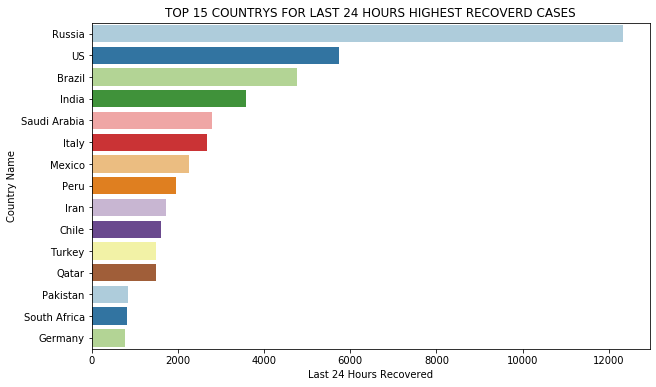

In [108]:
plt.figure(figsize=(10,6))
plt.title('TOP 15 COUNTRYS FOR LAST 24 HOURS HIGHEST RECOVERD CASES')
sns.barplot(x=Top_15_Recoverd_24hr['Last 24 Hours Recovered'],y=Top_15_Recoverd_24hr['Country Name'],palette='Paired')

OBSERVATIONS
-> HIHGHEST RECOVER CASES IN LAST 24 HOURS ARE HIGHER IN RUSSIA FOLLOWED BY US,BRAZIL

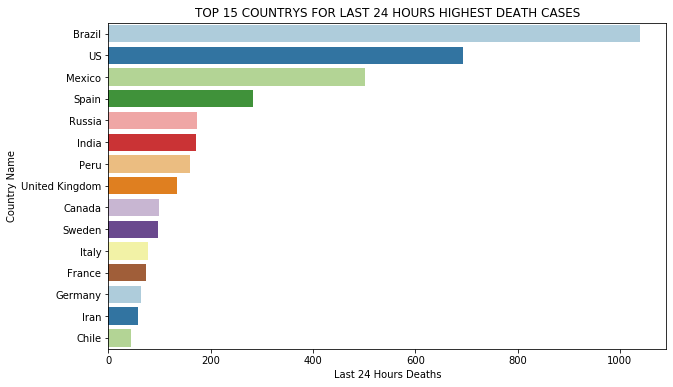

In [109]:
plt.figure(figsize=(10,6))
plt.title('TOP 15 COUNTRYS FOR LAST 24 HOURS HIGHEST DEATH CASES')
sns.barplot(x=Top_15_Deaths_24hr['Last 24 Hours Deaths'],y=Top_15_Deaths_24hr['Country Name'],palette='Paired')

OBSERVATIONS
-> FOR THE LAST 24 HOURS HIGHEST DEATH RATES ARE HIGHER IN BRAZIL COUNTRY FOLLOWED BY US,MEXICO

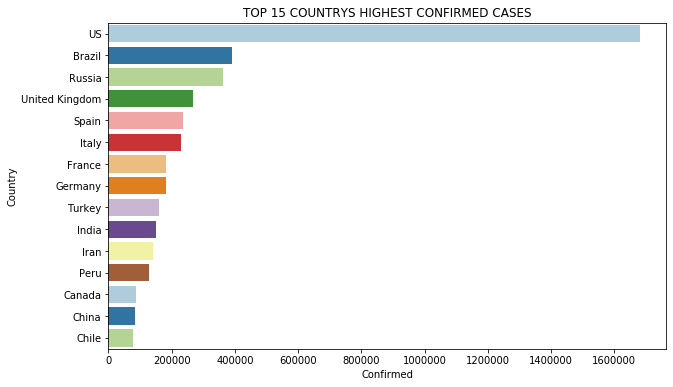

In [110]:
plt.figure(figsize=(10,6))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
plt.title('TOP 15 COUNTRYS HIGHEST CONFIRMED CASES')
sns.barplot(x=top_15_confirmed['Confirmed'],y=top_15_confirmed.index,palette='Paired')

OBSERVATIONS
-> HIGHEST CONFIRMED CASES SEEN AT U.S NEXT TO BRAZIL

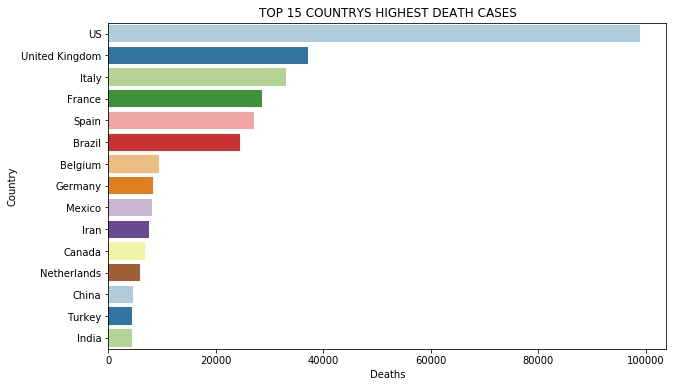

In [111]:
plt.figure(figsize=(10,6))
plt.title('TOP 15 COUNTRYS HIGHEST DEATH CASES')
sns.barplot(x=top_15_deaths['Deaths'],y=top_15_deaths.index,palette='Paired')

OBSERVATIONS
-> HIGHEST DEATH CASES ARE SEEN IN U.S FOLLOWED BY UNITED KINGDOM,ITALY

# INDIA ANALYSIS

In [112]:
india_data=cv[cv["Country"]=="India"]
datewise_india=india_data.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])
print("Total Active Cases: ",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    150793
Recovered     64277
Deaths         4344
Name: 2020-05-26 00:00:00, dtype: int64
Total Active Cases:  82172
Total Closed Cases:  68621


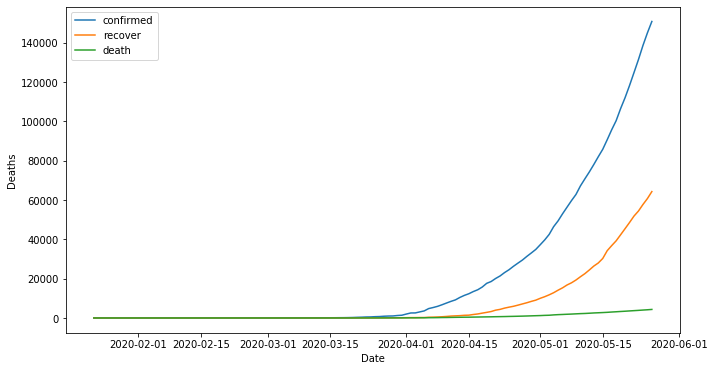

In [113]:
plt.figure(figsize=(11,6))
plt.xlabel('date')
plt.ylabel('cases')
sns.lineplot(x=datewise_india.index,y=datewise_india['Confirmed'],label='confirmed')
sns.lineplot(x=datewise_india.index,y=datewise_india['Recovered'],label='recover')
sns.lineplot(x=datewise_india.index,y=datewise_india['Deaths'],label='death')

OBSERVATIONS
-> CONFIRM CASE ARE INCREASED FROM MONTH APRIL IN INDIA WHERE AS DEATH CASES ARE LOWER

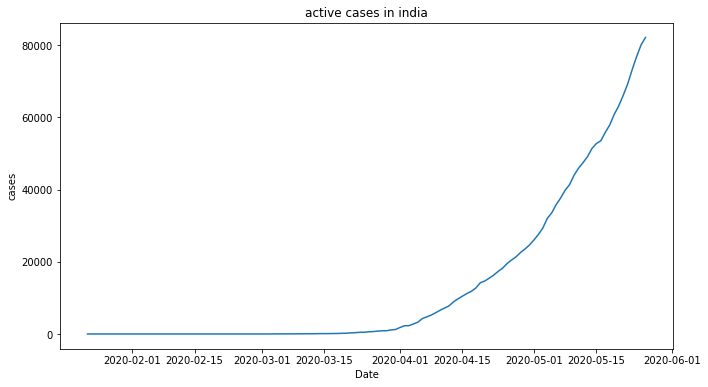

In [114]:
plt.figure(figsize=(11,6))
plt.xlabel('date')
plt.ylabel('cases')
plt.title('active cases in india')
sns.lineplot(x=datewise_india.index,y=datewise_india["Confirmed"]-datewise_india["Recovered"]-datewise_india["Deaths"])

In [115]:
india_increase_confirm=[]
india_increase_recover=[]
india_increase_deaths=[]
for i in range(datewise_india.shape[0]-1):
    india_increase_confirm.append(((datewise_india["Confirmed"].iloc[i+1])/datewise_india["Confirmed"].iloc[i]))
    india_increase_recover.append(((datewise_india["Recovered"].iloc[i+1])/datewise_india["Recovered"].iloc[i]))
    india_increase_deaths.append(((datewise_india["Deaths"].iloc[i+1])/datewise_india["Deaths"].iloc[i]))
india_increase_confirm.insert(0,1)
india_increase_recover.insert(0,1)
india_increase_deaths.insert(0,1)

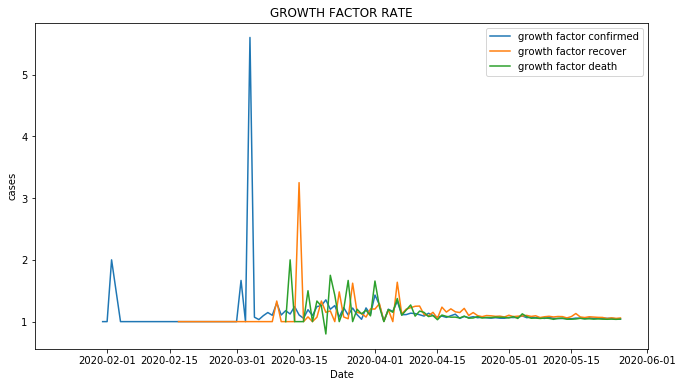

In [116]:
plt.figure(figsize=(11,6))
plt.xlabel('date')
plt.ylabel('cases')
plt.title('GROWTH FACTOR RATE')
sns.lineplot(x=datewise_india.index,y=india_increase_confirm,label='growth factor confirmed')
sns.lineplot(x=datewise_india.index,y=india_increase_recover,label='growth factor recover')
sns.lineplot(x=datewise_india.index,y=india_increase_deaths,label='growth factor death')

OBSERVATIONS
-> GROWTH OF CONFIRMED CASES ARE HIGHER IN MONTH OF MARCH

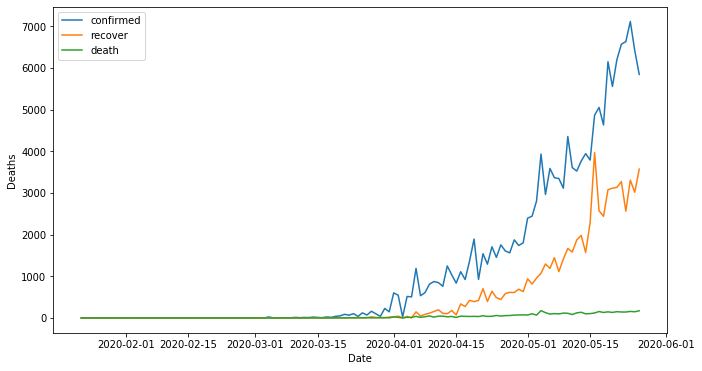

In [117]:
plt.figure(figsize=(11,6))
plt.xlabel('date')
plt.ylabel('cases')
sns.lineplot(x=datewise_india.index,y=datewise_india['Confirmed'].diff().fillna(0),label='confirmed')
sns.lineplot(x=datewise_india.index,y=datewise_india['Recovered'].diff().fillna(0),label='recover')
sns.lineplot(x=datewise_india.index,y=datewise_india['Deaths'].diff().fillna(0),label='death')

In [118]:
datewise_india["WeekOfYear"]=datewise_india.index.weekofyear

week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(datewise_india["WeekOfYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekOfYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1

(Text(0.5, 0, 'Week Number'), Text(0, 0.5, 'Number of Cases'))

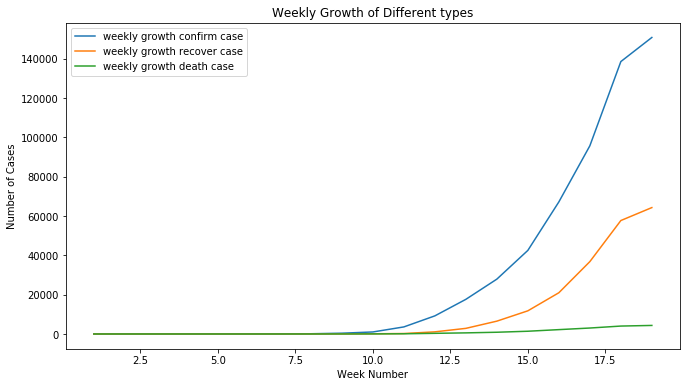

In [119]:
plt.figure(figsize=(11,6))
sns.lineplot(x=week_num_india, y=india_weekwise_confirmed,label='weekly growth confirm case')
sns.lineplot(x=week_num_india, y=india_weekwise_recovered,label='weekly growth recover case')
sns.lineplot(x=week_num_india, y=india_weekwise_deaths,label='weekly growth death case')
plt.title('Weekly Growth of Different types')
plt.xlabel("Week Number"),plt.ylabel("Number of Cases")

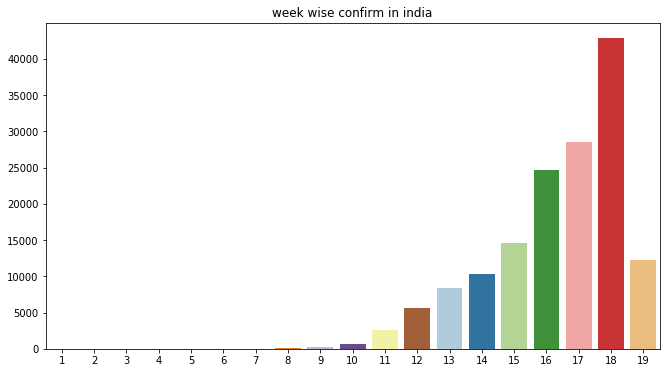

In [120]:
plt.figure(figsize=(11,6))
plt.title('week wise confirm in india')
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_confirmed).diff().fillna(0),palette='Paired')

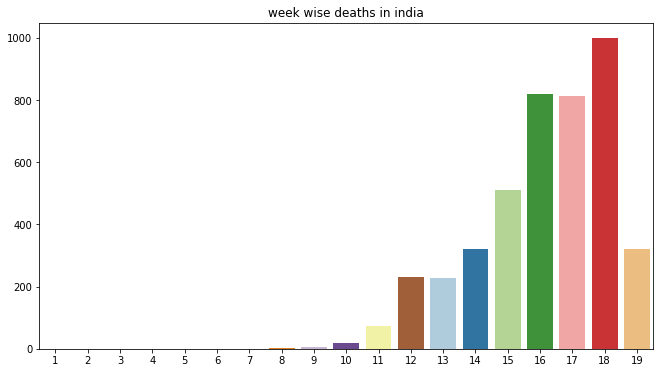

In [121]:
plt.figure(figsize=(11,6))
plt.title('week wise deaths in india')
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_deaths).diff().fillna(0),palette='Paired')

In [122]:
cv.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [123]:
cv.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [124]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [125]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [126]:
lin_reg=LinearRegression(normalize=True)

In [127]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [128]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [129]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  1476324.2626345628


In [130]:
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

Text(0.5, 1.0, 'Confirmed Cases Linear Regression Prediction')

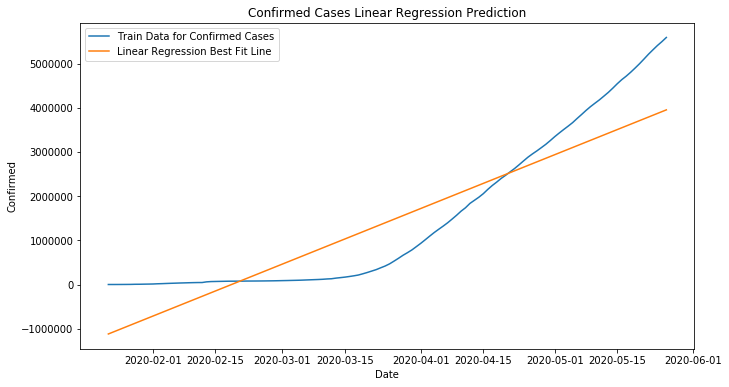

In [131]:
plt.figure(figsize=(11,6))
sns.lineplot(x=datewise.index,y=datewise['Confirmed'],label='Train Data for Confirmed Cases')
sns.lineplot(x=datewise.index,y=linreg_output,label='Linear Regression Best Fit Line')
plt.title('Confirmed Cases Linear Regression Prediction')

# Support Vector Machine ModelRegressor for Prediction of Confirmed Cases

In [132]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [133]:
from sklearn import svm
from sklearn.svm import SVR

In [134]:
#Intializing SVR Model
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)

In [135]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.01, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [136]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [137]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  287431.4750385228


In [138]:
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))

Text(0.5, 1.0, 'Confirmed Cases Support Vector Machine Prediction')

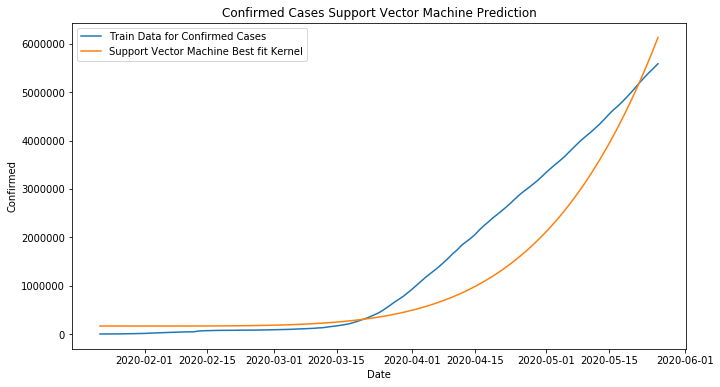

In [139]:
plt.figure(figsize=(11,6))
sns.lineplot(x=datewise.index,y=datewise['Confirmed'],label='Train Data for Confirmed Cases')
sns.lineplot(x=datewise.index,y=prediction_svm,label='Support Vector Machine Best fit Kernel')
plt.title('Confirmed Cases Support Vector Machine Prediction')

In [140]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [141]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),
                               columns=["Dates","Linear Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,SVM Prediction
0,2020-05-27,3992291.018772,6375101.168305
1,2020-05-28,4032855.000741,6625485.609423
2,2020-05-29,4073418.982709,6883881.595679
3,2020-05-30,4113982.964677,7150479.866273
4,2020-05-31,4154546.946646,7425474.164082


predictions of linear regression values and svm predictions

RESULT
-> BY THESE PREDICTION THAT THE COVID 19 CONFIRMED CASES WERE INCREASED GRADUALLY THROUGHOUT THE WORLD

In [144]:
from joblib import dump,load
dump(cv,'COVID_19_PROJECT.joblib')

['COVID_19_PROJECT.joblib']